In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
a=pd.read_csv("C:\\Users\\sowmy\\Downloads\\Paper2\\credit_card.csv")
df=pd.DataFrame(a)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [4]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [5]:
# taking 50 random samples
df1=df.sample(50)

##### visualization for primary analysis

<AxesSubplot:xlabel='PURCHASES'>

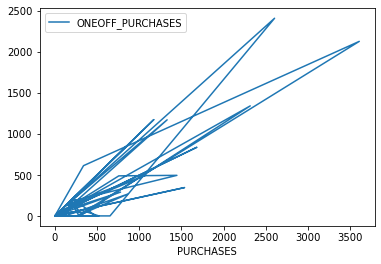

In [6]:
df1.plot(x='PURCHASES', y='ONEOFF_PURCHASES')

<AxesSubplot:xlabel='PURCHASES'>

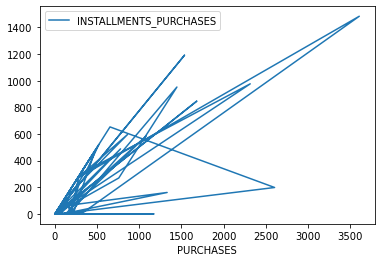

In [7]:
df1.plot(x='PURCHASES', y='INSTALLMENTS_PURCHASES')

<AxesSubplot:xlabel='PURCHASES', ylabel='CASH_ADVANCE'>

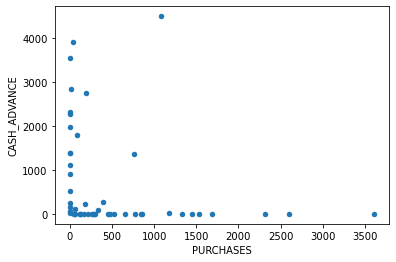

In [8]:
df1.plot(x='PURCHASES', y='CASH_ADVANCE',kind="scatter")

# What does the primary analysis of several categorical features reveal?

###     The dataset contains a number of purchases made by the credit card account holder and also said number of purchases done in installments and also said the tenure of credit card user.From the above visualiztion we can see that there are only fewcash advance and more installments purchases have done

# Perform the following Exploratory Data Analysis tasks:

## a. Missing Value Analysis

In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# Though there are less number of null values in credit limit feature we will replace it with median value
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)
df["CREDIT_LIMIT"].isnull().sum()

0

In [11]:
df["MINIMUM_PAYMENTS"].fillna("0",inplace=True)
df["MINIMUM_PAYMENTS"].isnull().sum()

0

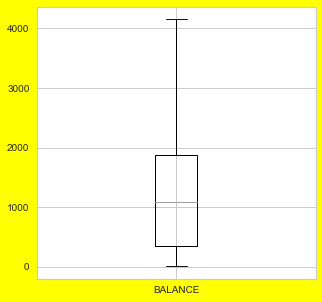

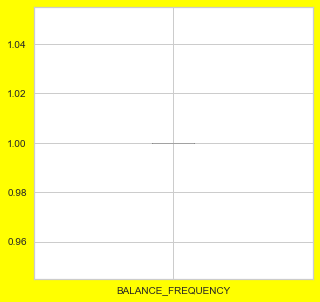

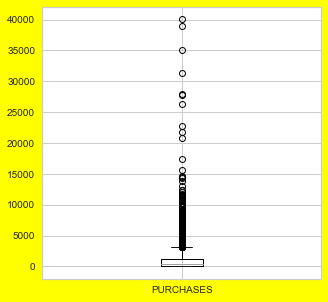

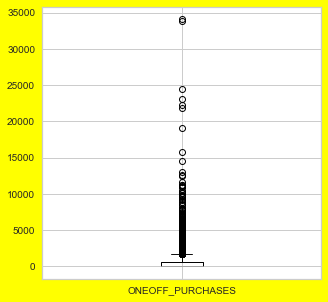

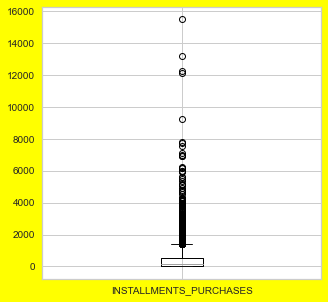

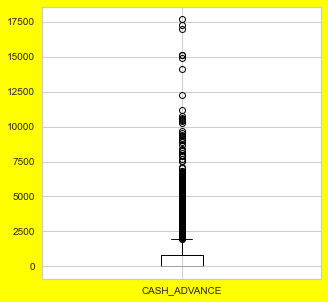

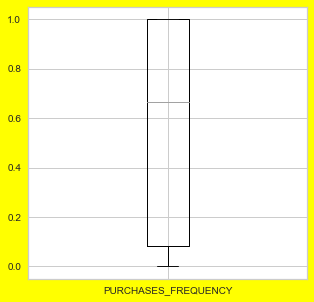

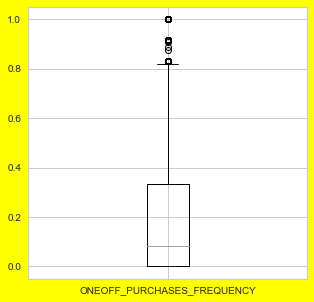

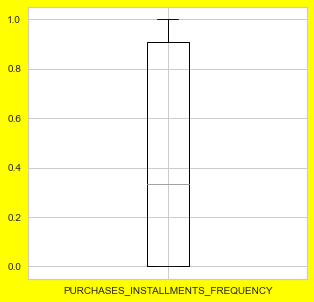

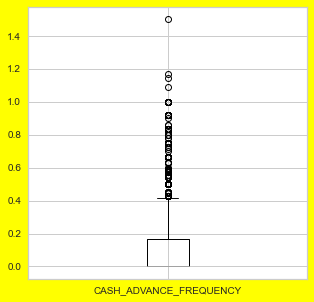

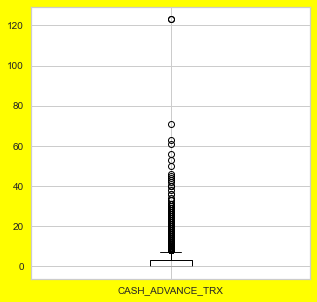

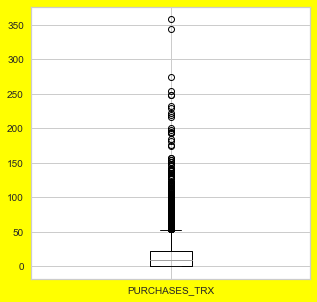

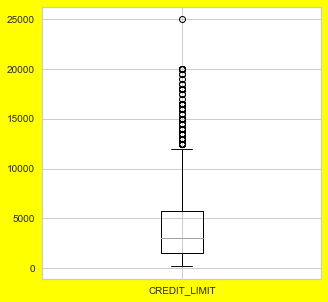

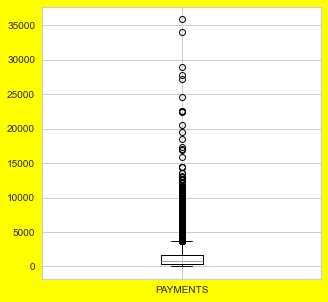

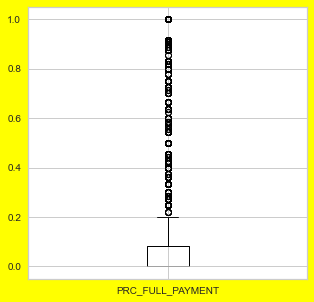

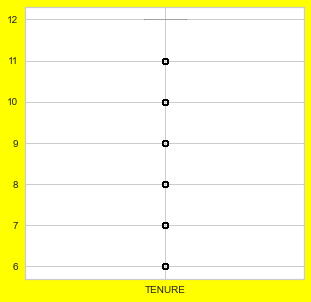

In [159]:
for column in df1:
    plt.figure(figsize=(5,5),facecolor="yellow",
    edgecolor="red",
   )
    df.boxplot([column])

## b. Outlier Treatment using the Z-score method

In [28]:
cols = ['BALANCE']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
from scipy import stats
df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df1=df

TypeError: unsupported operand type(s) for +: 'float' and 'str'

## Deal with correlated variables

In [31]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,NaN,0.055556,0.083782,-0.021107,0.397359,-0.272042,-0.036079,-0.236797,0.379839,0.306759,0.002989,0.223489,0.204572,-0.433535,0.063093
BALANCE_FREQUENCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PURCHASES,0.055556,NaN,1.000000,0.926548,0.709959,-0.103929,0.410799,0.516861,0.330574,-0.174937,-0.118445,0.741638,0.384719,0.756217,0.315340,0.079984
ONEOFF_PURCHASES,0.083782,NaN,0.926548,1.000000,0.392931,-0.073371,0.282922,0.560473,0.133203,-0.124630,-0.083839,0.623238,0.358150,0.713442,0.249930,0.069337
INSTALLMENTS_PURCHASES,-0.021107,NaN,0.709959,0.392931,1.000000,-0.116753,0.474319,0.214094,0.558417,-0.194263,-0.132590,0.646154,0.269836,0.513032,0.303026,0.065548
CASH_ADVANCE,0.397359,NaN,-0.103929,-0.073371,-0.116753,1.000000,-0.269717,-0.135024,-0.223718,0.632468,0.657952,-0.135516,0.130098,0.331722,-0.130787,-0.056476
PURCHASES_FREQUENCY,-0.272042,NaN,0.410799,0.282922,0.474319,-0.269717,1.000000,0.486119,0.848325,-0.387934,-0.268719,0.565526,0.198358,0.189898,0.420066,-0.006961
ONEOFF_PURCHASES_FREQUENCY,-0.036079,NaN,0.516861,0.560473,0.214094,-0.135024,0.486119,1.000000,0.106085,-0.177081,-0.123704,0.545244,0.370010,0.351965,0.262958,0.092010
PURCHASES_INSTALLMENTS_FREQUENCY,-0.236797,NaN,0.330574,0.133203,0.558417,-0.223718,0.848325,0.106085,1.000000,-0.325053,-0.224550,0.523277,0.108452,0.148862,0.345079,0.000044
CASH_ADVANCE_FREQUENCY,0.379839,NaN,-0.174937,-0.124630,-0.194263,0.632468,-0.387934,-0.177081,-0.325053,1.000000,0.804771,-0.205009,-0.025821,0.103154,-0.232421,-0.108477


# Perform dimensionality reduction using PCA such that the 95% of the variance is explained


In [33]:
df.shape

(5303, 18)

In [40]:
df=df.drop(["CUST_ID"],axis=1)

In [51]:
pca = PCA(n_components=3)
pca.fit(df)
df_pca = pca.transform(df)
df_pca = pd.DataFrame(data_pca)
df_pca.head()

,0,1,2
0,1977.514159,-3032.405981,-177.556947
1,-3032.069756,908.105330,-671.165724
2,-1546.559159,1607.280089,1301.727465
3,13254.775229,-99.638619,-1634.127816
4,-1980.786925,334.668134,-217.677139


In [52]:
df_pca.shape

(5303, 3)

# Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

In [55]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_pca)
    kmeanModel.fit(df_pca)
  
    distortions.append(sum(np.min(cdist(df_pca, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_pca.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(df_pca, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_pca.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [59]:
# Using the different values of Distortion:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 3563.063667192956
2 : 2638.87645127041
3 : 2440.1350407325463
4 : 2272.7100199935353
5 : 2181.3299418865
6 : 1991.4253637941774
7 : 1882.242038218099
8 : 1737.4838953961714
9 : 1665.9984791591742


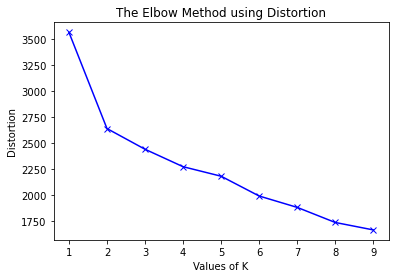

In [60]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [61]:
# using different values of inertia
for key, val in mapping2.items():
    print(f'{key} of inertia: {val}')

1 of inertia: 120435933518.35732
2 of inertia: 77597665785.63014
3 of inertia: 57706528002.16424
4 of inertia: 46536229259.73222
5 of inertia: 39225035139.77557
6 of inertia: 32582791410.11004
7 of inertia: 28492005261.52094
8 of inertia: 25254980330.40225
9 of inertia: 23200652953.03748


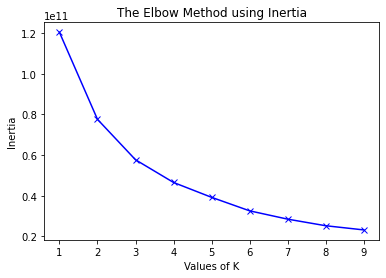

In [62]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [87]:
inertia=[]
iu=range(1,5)
for i in range(1,5):
    kmeans=KMeans(n_clusters=i)
    kmeans=kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

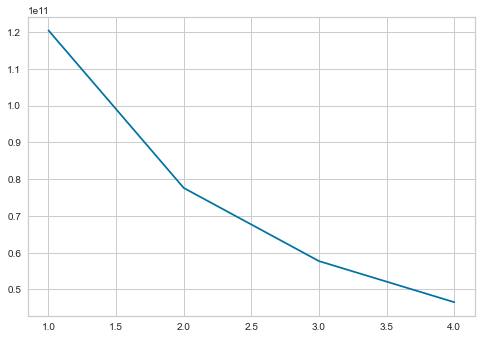

In [118]:
plt.plot(iu, inertia, 'bx-')

optimum value of k for k-means clustering using the elbow method is 2

# Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

Silhouetter Score: 0.504


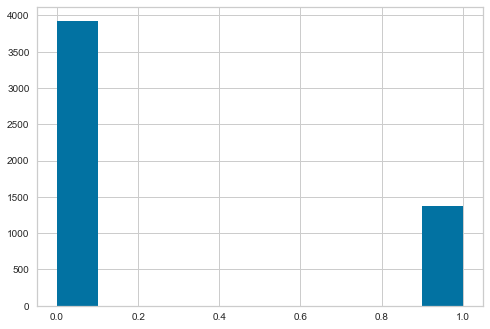

Silhouetter Score: 0.492


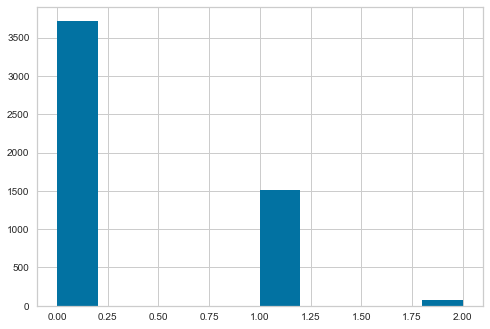

Silhouetter Score: 0.482


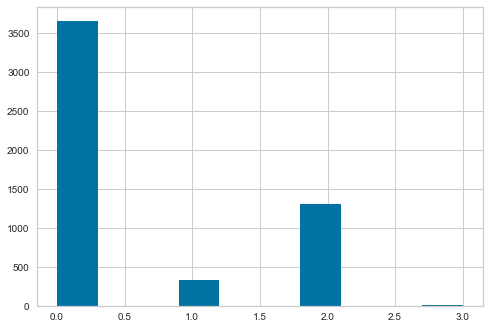

In [160]:
l=[2,3,4]
for i in l:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_pca)
    score = silhouette_score(df_pca, km.labels_, metric='euclidean')
    print('Silhouetter Score: %.3f' % score)
    plt.hist(km.labels_)
    plt.show()

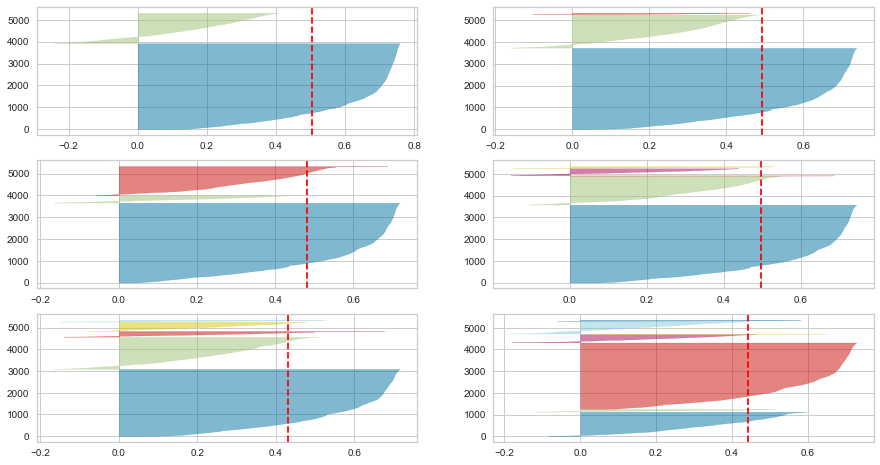

In [139]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3, 2, figsize=(15,8))
l=[2,3,4,5,6,7]
for i in [2, 3, 4, 5, 6,7]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_pca)